Machine Learning 
===============
Innovative Assignment
---------------------------------
Developed By: 

- Gahan Saraiya (18MCEC10)  

- Priyanka Bhati (18MCEC02)

---
Sample Dataset:
```csv
0,235.47,12.22,0.271,25.2,45.6,25.28
0,235.47,12.22,0.271,25.2,45.6,25.28
0,235.66,12.22,1.061,25.2,45.6,25.28
0,235.66,12.11,1.061,25.2,45.6,25.28
0,235.66,12.06,1.341,25.2,45.6,25.28
0,236.04,12.01,0.411,25.2,45.6,25.28
0,236.04,12.06,0.411,25.2,45.6,25.28
0,235.7,12.01,0.941,25.2,45.6,25.28
0,235.7,12.1,0.941,25.2,45.6,25.28
0,235.7,12.1,0.941,25.2,45.6,25.28
0,236.23,12.1,0.381,25.2,45.6,25.28
1,229.98,11.77,1.281,22.7,39,28.67
1,229.98,11.77,1.281,22.7,39,28.67
1,230.95,11.77,0.541,22.7,39,28.67
1,230.95,11.82,0.541,22.7,39,28.67
1,230.95,11.82,0.541,22.7,39,28.67
1,230.95,11.82,0.601,22.7,39,28.77
1,230.38,11.82,0.601,22.7,39,28.77
1,230.38,11.88,0.601,22.7,39,28.77
1,230.38,11.88,0.601,22.7,39,28.77
```
---

**First attribute** : Class value **0** or **1**  

**2nd attribute** onwards - select one to work for **features**


Use this other attributes as input to Neural Network and classify the tuple.

---
Tweak 
--- 
In general, activation function at output layer yields exact class value  
i.e. 0 or 1 but out put should be probabilistic which we get before classifying it to 0 or 1

### References for Visulization
- https://nbviewer.jupyter.org/urls/gist.github.com/fonnesbeck/5850463/raw/a29d9ffb863bfab09ff6c1fc853e1d5bf69fe3e4/3.+Plotting+and+Visualization.ipynb

In [1]:
"""
Implementing Classifier with Neural Network and Regression for given dataset
"""
__author__ = ["Gahan Saraiya", "Priyanka Bhati"]

----------

Introduction
------------

A hypothesis `h(x)`, takes an *input* and gives us the *estimated output value*.

This hypothesis can be a as simple as a one variable linear equation, .. up to a very complicated and long multivariate equation with respect to the type of the algorithm we’re using (*i.e. linear regression, logistic regression..etc*).

[![h(x)][1]][1]

Our task is to find the ***best Parameters*** (a.k.a Thetas or Weights) that give us the ***least error*** in predicting the output. We call this error a ***Cost or Loss Function*** and apparently our goal is to ***minimize*** it in order to get the best predicted output!

One more thing to recall, that the relation between the parameter value and its effect on the cost function (i.e. the error) looks like a ***bell curve*** (i.e. **Quadratic**; recall this because it’s very important) .

So if we start at any point in that curve and if we keep taking the derivative (i.e. tangent line) of each point we stop at, we will end up at what so called the **Global Optima** as shown in this image:
[![J(w) bell curve][2]][2]

If we take the partial derivative at minimum cost point (i.e. global optima) we find the ***slope*** of the tangent line = **0** (then we know that we reached our target).

That’s valid only if we have *Convex* Cost Function, but if we don’t, we may end up stuck at what so called ***Local Optima***; consider this non-convex function:


[![non-convex][3]][3]


Now you should have the intuition about the hack relationship between what we are doing and the terms:  *Deravative*, *Tangent Line*, *Cost Function*, *Hypothesis* ..etc.

*Side Note: The above mentioned intuition also related to the Gradient Descent Algorithm (see later).*


----------

Background
----------

**Linear Approximation:**

Given a function, `f(x)`, we can find its tangent at `x=a`. The equation of the tangent line L(x) is: `L(x)=f(a)+f′(a)(x−a)`.

Take a look at the following graph of a function and its tangent line:

[![tangent line][4]][4]

From this graph we can see that near `x=a`, the tangent line and the function have nearly the same graph. On occasion we will use the tangent line, `L(x)`, as an approximation to the function, `f(x)`, near `x=a`. In these cases we call the tangent line the linear approximation to the function at `x=a`.

**Quadratic Approximation:**

Same like linear approximation but this time we are dealing with a curve but we **cannot** find the point near to **0** by using the tangent line.

Instead, we use a **parabola** (*which is a curve where any point is at an equal distance from a fixed point or a fixed straight line*), like this:

[![quadratic function][5]][5]

And in order to fit a good parabola, both parabola and quadratic function should have same value, same first derivative, AND second derivative, ... the formula will be (*just out of curiosity*): `Qa(x) = f(a) + f'(a)(x-a) + f''(a)(x-a)2/2`

*Now we should be ready to do the comparison in details.*


----------
  [1]: https://i.stack.imgur.com/i8OO5.png
  [2]: https://i.stack.imgur.com/mZ9UU.png
  [3]: https://i.stack.imgur.com/WYEux.png
  [4]: https://i.stack.imgur.com/u0vU0.png
  [5]: https://i.stack.imgur.com/Yd2mE.png
  [6]: http://scikit-learn.org/stable/modules/linear_model.html
  [7]: https://i.stack.imgur.com/K568D.png

In [2]:
# Import built-in modules
import os
import numpy as np # linear algebra
import itertools
from subprocess import check_output
from collections import Counter

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
# Import 3rd party Python packages
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting
from sklearn import linear_model, exceptions
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# dividing into train and test
from sklearn.model_selection import train_test_split
import seaborn as sns
# print(check_output(["ls", "input"]).decode("utf8"))
# %matplotlib inline

In [4]:
WORKING_DIR = os.getcwd()
DATASET_DIR = os.path.join(WORKING_DIR, "dataset")
DATA_PATH_B = os.path.join(DATASET_DIR, "B.csv")
DATA_PATH_navy = os.path.join(DATASET_DIR, "navy_svm.csv")

In [5]:
# read data frame
# bdf = pd.read_csv(DATA_PATH_B)
navyData = pd.read_csv(DATA_PATH_navy)
navyData.head()

,class,a1,a2,a3,a4,a5,a6
0,0,235.47,12.22,0.271,25.2,45.6,25.28
1,0,235.47,12.22,0.271,25.2,45.6,25.28
2,0,235.66,12.22,1.061,25.2,45.6,25.28
3,0,235.66,12.11,1.061,25.2,45.6,25.28
4,0,235.66,12.06,1.341,25.2,45.6,25.28


In [6]:
navyData.describe()

,class,a1,a2,a3,a4,a5,a6
count,582905.000000,582905.000000,582905.000000,582905.000000,582905.000000,582905.000000,582905.000000
mean,0.283895,232.478022,11.897178,0.784452,21.182873,38.854022,27.888130
std,0.450887,4.017430,0.372777,0.410430,3.781182,4.108154,1.400513
min,0.000000,217.590000,0.160000,0.031000,16.400000,27.900000,-11.550000
25%,0.000000,229.670000,11.640000,0.451000,18.400000,36.800000,26.880000
50%,0.000000,233.740000,11.860000,0.681000,20.100000,39.100000,27.540000
75%,1.000000,235.700000,12.080000,1.051000,22.700000,40.600000,28.670000
max,1.000000,244.600000,16.330000,5.781000,39.300000,52.700000,37.130000


In [7]:
navyData.groupby('class').mean()

,a1,a2,a3,a4,a5,a6
class,,,,,,
0,232.752346,11.800671,0.747009,19.535520,39.021003,27.171677
1,231.786060,12.140608,0.878898,25.338199,38.432825,29.695329


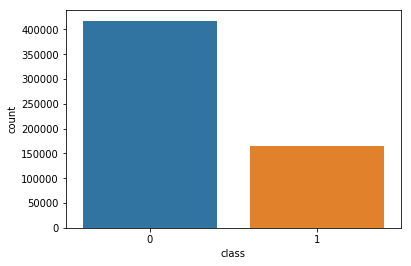

In [8]:
sns.countplot(navyData['class']);

In [9]:
##Saperating attributes and labels
navy_data_attrib = navyData.iloc[:, 1:]
# preserves column header rather than converting to series navyData['class']
navy_data_class = navyData.iloc[:, [0]] 

attrib_train, attrib_test, class_train, class_test = train_test_split(
            navy_data_attrib, 
            navy_data_class,
        #     train_size=0.171556,  # Exact 100000 for train size 0.171556
        #     test_size=0.4,
            shuffle=True, # boolean, optional
            stratify=None # array-like or None: If not None, 
                        #data is split in a stratified fashion, using this as the class labels.
)

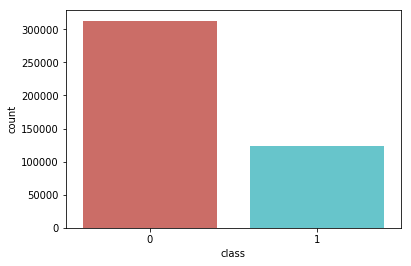

In [10]:
sns.countplot(x='class', data=class_train, palette='hls');

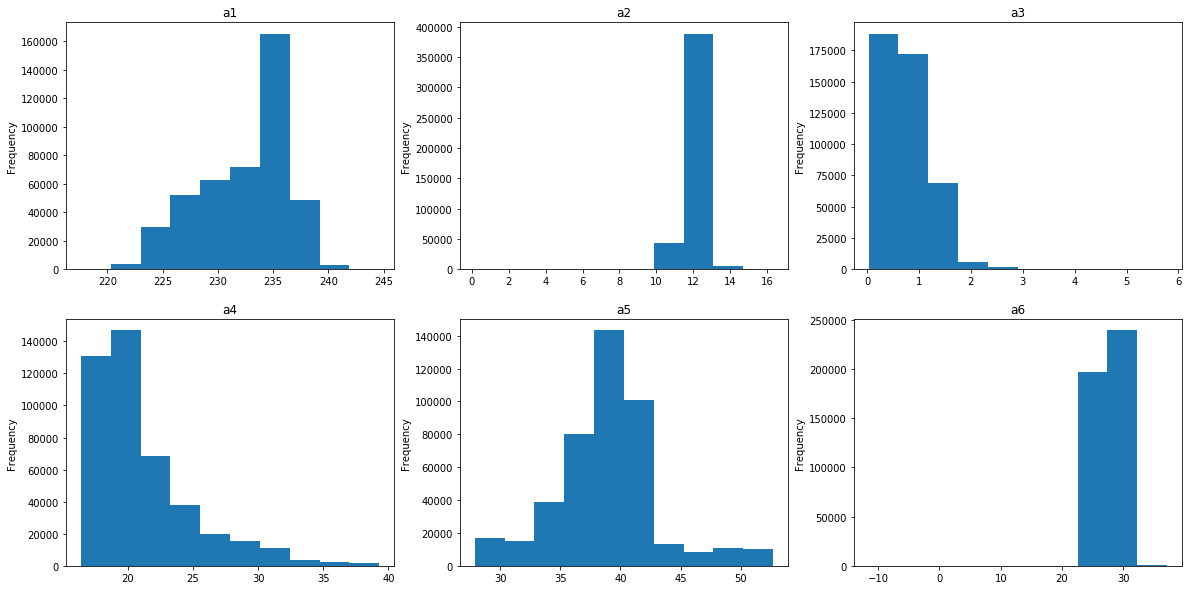

In [11]:
# attrib_train.a1.plot(kind='hist', subplots=True, layout=(1,2));
# attrib_train.a2.plot(kind='hist', subplots=True, layout=(1,2));
# attrib_train.a2.hist(subplots=True, layout=(1,2));
r, c = 2, 3 # row x col
fig, axes = plt.subplots(nrows=r, ncols=c, figsize=(20, 10))
cols = ['a1','a2','a3', 'a4', 'a5', 'a6']
for i, var in enumerate(cols):
    attrib_train[var].plot(kind='hist', ax=axes[i//c, i%3], title=var)

Comparison between the methods
------------------------------

**1. Newton’s Method**

Recall the motivation for gradient descent step at x: we minimize the quadratic function (i.e. Cost Function). 

Newton’s method uses in a sense a ***better*** quadratic function minimisation.
A better because it uses the quadratic approximation (i.e. first AND *second* partial derivatives).

You can imagine it as a twisted Gradient Descent with The Hessian (*The Hessian is a square matrix of second-order partial derivatives of order nxn*).

Moreover, the geometric interpretation of Newton's method is that at each iteration one approximates `f(x)` by a quadratic function around `xn`, and then takes a step towards the maximum/minimum of that quadratic function (in higher dimensions, this may also be a saddle point). Note that if `f(x)` happens to be a quadratic function, then the exact extremum is found in one step. 

**Drawbacks:**

1. It’s computationally ***expensive*** because of The Hessian Matrix (i.e. second partial derivatives calculations).

2. It attracts to ***Saddle Points*** which are common in multivariable optimization (i.e. a point its partial derivatives disagree over whether this input should be a maximum or a minimum point!).



**2. Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm:**

In a nutshell, it is analogue of the Newton’s Method but here the Hessian matrix is ***approximated*** using updates specified by gradient evaluations (or approximate gradient evaluations). In other words, using an estimation to the inverse Hessian matrix.

The term Limited-memory simply means it stores only a few vectors that represent the approximation implicitly.

If I dare say that when dataset is ***small***, L-BFGS relatively performs the best compared to other methods especially it saves a lot of memory, however there are some “*serious*” drawbacks such that if it is unsafeguarded, it may not converge to anything. 


**3. A Library for Large Linear Classification:**

It’s a linear classification that supports logistic regression and linear support vector machines (*A linear classifier achieves this by making a classification decision based on the value of a linear combination of the characteristics i.e feature value*).

The solver uses a coordinate descent (CD) algorithm that solves optimization problems by successively performing approximate minimization along coordinate directions or coordinate hyperplanes.

`LIBLINEAR` is the winner of ICML 2008 large-scale learning challenge. It applies *Automatic parameter selection* (a.k.a L1 Regularization) and it’s recommended when you have high dimension dataset (*recommended for solving large-scale classification problems*)

**Drawbacks:**

1. It may get stuck at a *non-stationary point* (i.e. non-optima) if the level curves of a function are not smooth.

2. Also cannot run in parallel. 

3. It cannot learn a true multinomial (multiclass) model; instead, the optimization problem is decomposed in a “one-vs-rest” fashion so separate binary classifiers are trained for all classes.

*Side note: According to Scikit Documentation: The “liblinear” solver is used by default for historical reasons.*


**4. Stochastic Average Gradient:**

SAG method optimizes the sum of a finite number of smooth convex functions. Like stochastic gradient (SG) methods, the SAG method's iteration cost is independent of the number of terms in the sum. However, by ***incorporating a memory of previous gradient values the SAG method achieves a faster convergence rate*** than black-box SG methods. 

It is **faster** than other solvers for *large* datasets, when both the number of samples and the number of features are large.

**Drawbacks:**

1. It only supports L2 penalization.

2. Its memory cost of `O(N)`, which can make it impractical for large N (*because it remembers the most recently computed values for approx. all gradients*).


**5. SAGA:**

The SAGA solver is a *variant* of SAG that also supports the non-smooth *penalty=l1* option (i.e. L1 Regularization). This is therefore the solver of choice for ***sparse*** multinomial logistic regression and it’s also suitable ***very Large*** dataset. 

*Side note: According to Scikit Documentation: The SAGA solver is often the best choice.* 


----------

Summary
--------

The following table is taken from [Scikit Documentation][6] 

[![Solver Comparison][7]][7]


  [1]: https://i.stack.imgur.com/i8OO5.png
  [2]: https://i.stack.imgur.com/mZ9UU.png
  [3]: https://i.stack.imgur.com/WYEux.png
  [4]: https://i.stack.imgur.com/u0vU0.png
  [5]: https://i.stack.imgur.com/Yd2mE.png
  [6]: http://scikit-learn.org/stable/modules/linear_model.html
  [7]: https://i.stack.imgur.com/K568D.png

In [12]:
if False:
    iterations = 1e5
    solvers = ["liblinear", "lbfgs", "sag", "newton-cg"]
    print("Applying Logistic Regression.../`-`\`|")
    print("{:<20}\t{:<20}".format("Classifier", "Accuracy"))
    print("{:<20}\t{:<20}".format("-"*20, "-"*20))
    for solver in solvers:
        print("{:<20}\t{:<20}".format("-"*20, "-"*20))
        logistic_reg_hypothesis = linear_model.LogisticRegression(
                                    C=iterations, # number of iterations
                                    multi_class="ovr", 
                                    solver=solver  # solver
                                )
        logistic_reg_hypothesis.fit(attrib_train, class_train.values.ravel())
        y_pred = logistic_reg_hypothesis.predict(attrib_test)
        print("{:<20}\t{:<20}".format(solver, accuracy_score(class_test['class'], y_pred)))

In [13]:
# # and plot the result
# plt.figure(1, figsize=(4, 3))
# plt.clf()
# plt.scatter(navy_data_attrib.ravel(), navy_data_class, color='black', zorder=20)
# # X_test = np.linspace(-5, 10, 300)

## With Technique for Classification multinomial

In [14]:
# iterations = 1e2
solvers = ["liblinear", "lbfgs", "sag", "newton-cg"][:3]
print("Applying Logistic Regression.../`-`\`|")
print("{:<10}\t{:<20}\t{:<20}".format("Classifier", "No. of Iterations", "Accuracy"))
# print("{:<20}\t{:<20}".format("-"*20, "-"*20))
for i in range(1, 8):
    print("="*50)
    iterations = 10**i
    for solver in solvers:
#         print("{:<20}\t{:<20}".format("-"*20, "-"*20))
        print("{:<10}\t{:<20}".format(solver, iterations), end="")
        logistic_reg_hypothesis = linear_model.LogisticRegression(
                    C=iterations, # number of iterations
                    multi_class="multinomial" if solver != "liblinear" else "ovr", 
                    solver=solver  # solver
                )
        logistic_reg_hypothesis.fit(attrib_train, class_train.values.ravel())
        y_pred = logistic_reg_hypothesis.predict(attrib_test)
        print("\t{:<20}".format(accuracy_score(class_test['class'], y_pred)))
    #     print('Classifier: {} having accuracy: {:.20f}'.format(solver, accuracy_score(class_test['class'], y_pred)))

Applying Logistic Regression.../`-`\`|
Classifier	No. of Iterations   	Accuracy            
liblinear 	10                  	0.9573929333616968  
lbfgs     	10                  	0.9650305022404908  
sag       	10                  	0.9570978610689852  
liblinear 	100                 	0.9573929333616968  
lbfgs     	100                 	0.9659843405820473  
sag       	100                 	0.9570704124836166  
liblinear 	1000                	0.9605083478010252  
lbfgs     	1000                	0.9671371811675256  
sag       	1000                	0.9574684169714603  
liblinear 	10000               	0.9604534506302882  
lbfgs     	10000               	0.9658539598015468  
sag       	10000               	0.9575439005812239  
liblinear 	100000              	0.9568096509226156  
lbfgs     	100000              	0.9657853383381254  
sag       	100000              	0.9575919356056187  
liblinear 	1000000             	0.9573929333616968  
lbfgs     	1000000             	0.9657304411673884  
sag    

In [15]:
# iterations = 1e2
RUN_NEWTON_METHOD = False
if RUN_NEWTON_METHOD:
    solvers = ["newton-cg"]
    print("Applying Logistic Regression.../`-`\`|")
    print("{:<10}\t{:<20}\t{:<20}".format("Classifier", "No. of Iterations", "Accuracy"))
    # print("{:<20}\t{:<20}".format("-"*20, "-"*20))
    for i in range(1, 8):
        print("="*50)
        iterations = 10**i
        for solver in solvers:
    #         print("{:<20}\t{:<20}".format("-"*20, "-"*20))
            print("{:<10}\t{:<20}".format(solver, iterations), end="")
            logistic_reg_hypothesis = linear_model.LogisticRegression(
                                C=iterations, # number of iterations
                                multi_class="ovr", 
                                solver=solver  # solver
                            )
            logistic_reg_hypothesis.fit(attrib_train, class_train.values.ravel())
            y_pred = logistic_reg_hypothesis.predict(attrib_test)
            print("\t{:<20}".format(accuracy_score(class_test['class'], y_pred)))

## With Technique for Classification One v/s All

In [16]:
# iterations = 1e2
solvers = ["liblinear", "lbfgs", "sag", "saga", "newton-cg"][:4]
print("Applying Logistic Regression.../`-`\`|")
print("{:<10}\t{:<20}\t{:<20}".format("Classifier", "No. of Iterations", "Accuracy"))
# print("{:<20}\t{:<20}".format("-"*20, "-"*20))
for i in range(1, 7):
    print("="*50)
    iterations = 10**i
    for solver in solvers:
#         print("{:<20}\t{:<20}".format("-"*20, "-"*20))
        print("{:<10}\t{:<20}".format(solver, iterations), end="")
        logistic_reg_hypothesis = linear_model.LogisticRegression(
                                C=iterations, # number of iterations
                                multi_class="ovr", 
                                solver=solver  # solver
                            )
        logistic_reg_hypothesis.fit(attrib_train, class_train.values.ravel())
        y_pred = logistic_reg_hypothesis.predict(attrib_test)
        print("\t{:<20}".format(accuracy_score(class_test['class'], y_pred)))

Applying Logistic Regression.../`-`\`|
Classifier	No. of Iterations   	Accuracy            
liblinear 	10                  	0.9573929333616968  
lbfgs     	10                  	0.9665538987284443  
sag       	10                  	0.9565557515079567  
saga      	10                  	0.9565969243860094  
liblinear 	100                 	0.9573929333616968  
lbfgs     	100                 	0.9671028704358149  
sag       	100                 	0.956521440776246   
saga      	100                 	0.9566106486786937  
liblinear 	1000                	0.9605083478010252  
lbfgs     	1000                	0.9672881483870525  
sag       	1000                	0.9565832000933252  
saga      	1000                	0.9566037865323516  
liblinear 	10000               	0.9604534506302882  
lbfgs     	10000               	0.9667048659479712  
sag       	10000               	0.9565694758006409  
saga      	10000               	0.9565969243860094  
liblinear 	100000              	0.9568096509226156  
lbfgs  